In [4]:
from keras.datasets import mnist   #导入手写数字数据集
from keras.utils import np_utils  #用于将每个类别值转换成多维的0/1向量
from keras.models import Sequential  #用于生成深度学习序列模型
from keras.layers import Dense, Activation  #全链接层，激活层

In [5]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [6]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


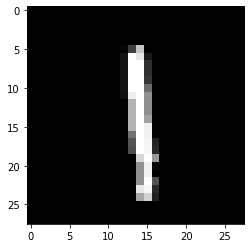

1

In [7]:
import matplotlib.pyplot as plt # 导入可视化的包
im = plt.imshow(X_train[8],cmap='gray')

plt.show()
y_train[8]

In [8]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1]*X_train.shape[2])  #原来的每个样例是28*28，变为1*784
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1]*X_test.shape[2])  #同上
print(X_train.shape)
print(X_test.shape)

X_train = X_train.astype('float32')  #把数据转换成浮点类型（原为字符串类型）
X_test = X_test.astype('float32')
#X_train /= 255   #归一化处理，原来是16位灰度的，调整为0-1之间的值，等效于 X_train = X_train / 255
#X_test /= 255


(60000, 784)
(10000, 784)


In [9]:
Y_train = np_utils.to_categorical(y_train, 10)  #将每个类别的值转换成一个10维的0、1向量
Y_test = np_utils.to_categorical(y_test, 10)

In [10]:
model = Sequential() #初始化一个序列模型，深度神经网络是多层的序列

#model.add(Dense(500, input_dim=784,activation='sigmoid'))
model.add(Dense(500, input_dim=784))  #第一层，输出为500维，输入为784维（每个图片的像素数28*28）
model.add(Activation('sigmoid'))  #激活函数
model.add(Dense(500))   #第二层，将第一层的输出作为输入，输出500维
model.add(Activation('sigmoid'))
model.add(Dense(10))    #输出层，将上一层的输出作为输入，输出10维
model.add(Activation('softmax')) #激活函数为softmax，根据概率最大决定分类结果

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 500)               392500    
                                                                 
 activation (Activation)     (None, 500)               0         
                                                                 
 dense_1 (Dense)             (None, 500)               250500    
                                                                 
 activation_1 (Activation)   (None, 500)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                5010      
                                                                 
 activation_2 (Activation)   (None, 10)                0         
                                                                 
Total params: 648,010
Trainable params: 648,010
Non-trai

In [12]:
model.compile(loss = 'mean_squared_error', optimizer = 'sgd', metrics = ['accuracy']) #编译：告知模型训练
#时所用的损失函数、优化器、评测指标；sgd为随机梯度下降法

In [13]:
model.fit(X_train, Y_train, batch_size=100, epochs=5)  #模型训练
#batch_size表示小批量优化学习的样本数。通过多少个样本的学习后调整一次参数
#epoch表示遍历整个数据集的遍数

Epoch 1/5
600/600 [==============================] - 3s 4ms/step - loss: 0.0899 - accuracy: 0.1453
Epoch 2/5
600/600 [==============================] - 2s 4ms/step - loss: 0.0882 - accuracy: 0.2142
Epoch 3/5
600/600 [==============================] - 2s 4ms/step - loss: 0.0867 - accuracy: 0.2641
Epoch 4/5
600/600 [==============================] - 2s 4ms/step - loss: 0.0851 - accuracy: 0.3209
Epoch 5/5
600/600 [==============================] - 2s 4ms/step - loss: 0.0834 - accuracy: 0.3695


In [14]:
score = model.evaluate(X_test, Y_test)  #用测试集进行评估

Y_predict = model.predict(X_test)

print('Test loss: ', score[0])
print('Test accuracy: ', score[1])

313/313 [==============================] - 0s 1ms/step - loss: 0.0823 - accuracy: 0.3970
Test loss:  0.08231975138187408
Test accuracy:  0.3970000147819519


In [15]:
Y_train_predict = model.predict(X_train[0:2])

In [16]:
print(Y_train_predict[0:2],Y_train[0:2])

[[0.15468684 0.13550787 0.07491889 0.09132645 0.08155777 0.10504302
  0.08673459 0.10683215 0.06551145 0.09788096]
 [0.22103018 0.10773907 0.0720233  0.07776281 0.08089446 0.06823513
  0.12016802 0.1055263  0.06795599 0.07866473]] [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
